### prepare

In [1]:
# import
# pip3 install -U scikit-learn
# sudo pacman -S python-scikit-learn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sys import maxsize
np.set_printoptions(threshold=maxsize)
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%pwd
%cd /mnt/815c1698-0606-4299-aed1-5b838adaea93/BLOCK/GITHUB/network/

'/home/th6mas/notebook'

/mnt/815c1698-0606-4299-aed1-5b838adaea93/BLOCK/GITHUB/network


In [4]:
# data: wheel
ttech3924 = np.loadtxt(open("data_wheel/39-muma-24.csv", "rb"), delimiter=",", skiprows=0)
ttech3928 = np.loadtxt(open("data_wheel/39-muma-28.csv", "rb"), delimiter=",", skiprows=0)
ttech3932 = np.loadtxt(open("data_wheel/39-muma-32.csv", "rb"), delimiter=",", skiprows=0)
#
ttech4724 = np.loadtxt(open("data_wheel/47-muma-24.csv", "rb"), delimiter=",", skiprows=0)
ttech4728 = np.loadtxt(open("data_wheel/47-muma-28.csv", "rb"), delimiter=",", skiprows=0)
ttech4732 = np.loadtxt(open("data_wheel/47-muma-32.csv", "rb"), delimiter=",", skiprows=0)
#
ttech5524 = np.loadtxt(open("data_wheel/55-muma-24.csv", "rb"), delimiter=",", skiprows=0)
ttech5528 = np.loadtxt(open("data_wheel/55-muma-28.csv", "rb"), delimiter=",", skiprows=0)
ttech5532 = np.loadtxt(open("data_wheel/55-muma-32.csv", "rb"), delimiter=",", skiprows=0)

In [5]:
# add volute size
ttech3924 = np.insert(ttech3924, 0, values=24, axis=1)
ttech3928 = np.insert(ttech3928, 0, values=28, axis=1)
ttech3932 = np.insert(ttech3932, 0, values=32, axis=1)
#
ttech4724 = np.insert(ttech4724, 0, values=24, axis=1)
ttech4728 = np.insert(ttech4728, 0, values=28, axis=1)
ttech4732 = np.insert(ttech4732, 0, values=32, axis=1)
#
ttech5524 = np.insert(ttech5524, 0, values=24, axis=1)
ttech5528 = np.insert(ttech5528, 0, values=28, axis=1)
ttech5532 = np.insert(ttech5532, 0, values=32, axis=1)

In [6]:
# add wheel size
ttech3924 = np.insert(ttech3924, 0, values=39, axis=1)
ttech3928 = np.insert(ttech3928, 0, values=39, axis=1)
ttech3932 = np.insert(ttech3932, 0, values=39, axis=1)
#
ttech4724 = np.insert(ttech4724, 0, values=47, axis=1)
ttech4728 = np.insert(ttech4728, 0, values=47, axis=1)
ttech4732 = np.insert(ttech4732, 0, values=47, axis=1)
#
ttech5524 = np.insert(ttech5524, 0, values=55, axis=1)
ttech5528 = np.insert(ttech5528, 0, values=55, axis=1)
ttech5532 = np.insert(ttech5532, 0, values=55, axis=1)

In [7]:
# assemble
ttechall = ttech3924
ttechall = np.append(ttechall,ttech3928,axis=0);
ttechall = np.append(ttechall,ttech3932,axis=0);
ttechall = np.append(ttechall,ttech4724,axis=0);
ttechall = np.append(ttechall,ttech4728,axis=0);
ttechall = np.append(ttechall,ttech4732,axis=0);
ttechall = np.append(ttechall,ttech5524,axis=0);
ttechall = np.append(ttechall,ttech5528,axis=0);
ttechall = np.append(ttechall,ttech5532,axis=0);

In [8]:
# split x, y
x_data = ttechall[0:len(ttechall),[0,1,2,3]]
y_data = ttechall[0:len(ttechall),[4,5]]

In [9]:
# shape
print("x shape is ", x_data.shape)
print("y shape is ", y_data.shape)

x shape is  (1328, 4)
y shape is  (1328, 2)


### test

In [10]:
# test
#x_dataT_24 = np.array([ [24,310,1.44389],[24,310,1.48225],[24,310,1.52611],[24,310,1.57655],[24,310,1.63571],
#                        [24,310,1.70551],[24,310,1.78899],[24,310,1.88981],[24,310,2.01351],[24,310,2.16737],
#                        [24,310,2.36391],[24,310,2.62075],[24,310,2.96815],[24,310,3.45468],[24,310,4.16895]])
############################################
N = 15
a = np.tile(np.array([50,30,400]),(N,1)); #a

x = [0,0,0,0]
y = np.linspace(np.sqrt(1.5),np.sqrt(4.5), N)**2
X,Yb = np.meshgrid(x,y); #Yb

Yb[:,:-1] = a; Yb
x_dataT = Yb
############################################

x_data = np.append(x_data,x_dataT,axis=0)

array([[ 50.        ,  30.        , 400.        ,   1.5       ],
       [ 50.        ,  30.        , 400.        ,   1.66096929],
       [ 50.        ,  30.        , 400.        ,   1.83014111],
       [ 50.        ,  30.        , 400.        ,   2.00751546],
       [ 50.        ,  30.        , 400.        ,   2.19309233],
       [ 50.        ,  30.        , 400.        ,   2.38687173],
       [ 50.        ,  30.        , 400.        ,   2.58885365],
       [ 50.        ,  30.        , 400.        ,   2.79903811],
       [ 50.        ,  30.        , 400.        ,   3.01742508],
       [ 50.        ,  30.        , 400.        ,   3.24401459],
       [ 50.        ,  30.        , 400.        ,   3.47880662],
       [ 50.        ,  30.        , 400.        ,   3.72180117],
       [ 50.        ,  30.        , 400.        ,   3.97299826],
       [ 50.        ,  30.        , 400.        ,   4.23239786],
       [ 50.        ,  30.        , 400.        ,   4.5       ]])

### normalize

In [11]:
# normalize
x_datan = MinMaxScaler().fit_transform(x_data)
y_datan = MinMaxScaler().fit_transform(y_data)

# shape
print("x shape is ", x_data.shape)
print("y shape is ", y_data.shape)

x shape is  (1343, 4)
y shape is  (1328, 2)


In [12]:
# test length
lenT = len(x_dataT)
# extract test
x_dataTn = x_datan[-lenT:,[0,1,2,3]]
# remove test
x_datan = x_datan[:-lenT]

In [13]:
# check shape
print("x shape is ", x_datan.shape)
print("y shape is ", y_datan.shape)

x shape is  (1328, 4)
y shape is  (1328, 2)


### show

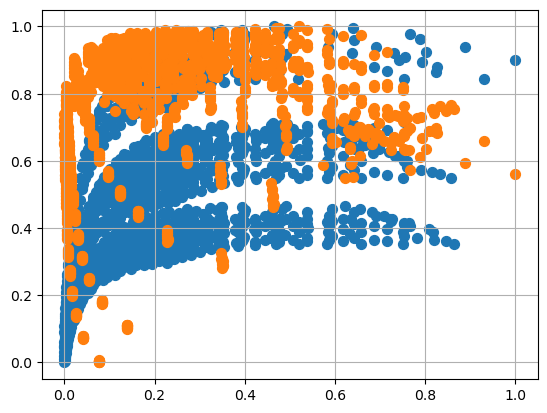

<Figure size 640x480 with 0 Axes>

In [14]:
# plot
plt.scatter(x_datan[:,[3]], y_datan[:,[0]], s=50)
plt.scatter(x_datan[:,[3]], y_datan[:,[1]], s=50)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

### model

In [15]:
# 2^n,relu,adam,mse

# input layer
n_features = x_datan.shape[1]
inputs  = keras.Input(shape=(n_features,))

dense   = keras.layers.Dense(256, activation="relu")
x       = dense(inputs)
x       = keras.layers.Dense(128, activation="relu")(x)
x       = keras.layers.Dense(64, activation="relu")(x)
x       = keras.layers.Dense(32, activation="relu")(x)
x       = keras.layers.Dense(16, activation="relu")(x)

# output layer
n_qualities = y_datan.shape[1]
outputs = keras.layers.Dense(n_qualities)(x)

# model
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
#model.summary()

2022-09-04 19:31:05.827645: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-04 19:31:05.876567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-04 19:31:05.876769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-04 19:31:05.877350: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

### train

In [16]:
# 3000,64
model.fit(x_datan, y_datan, batch_size=64, epochs=3000, verbose=0)

### predict

In [17]:
# predict test
y_predictedTn = model.predict(x_dataTn)

1/1 [==============================] - 0s 52ms/step


### eval


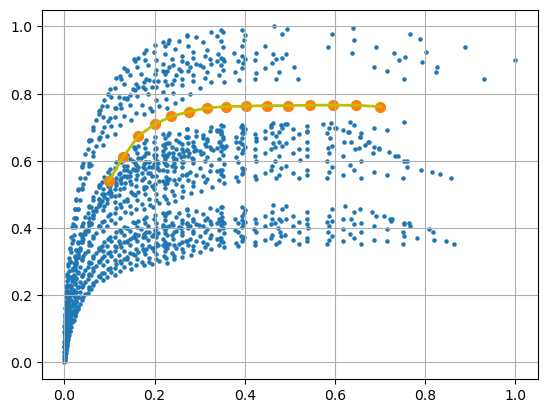

In [18]:
# plot flow
plt.scatter(x_datan[:,[3]], y_datan[:,[0]], s=5)

# test flow
plt.scatter(x_dataTn[:,[3]], y_predictedTn[:,[0]], s=50)
plt.plot   (x_dataTn[:,[3]], y_predictedTn[:,[0]], 'y', linewidth=2)

plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)

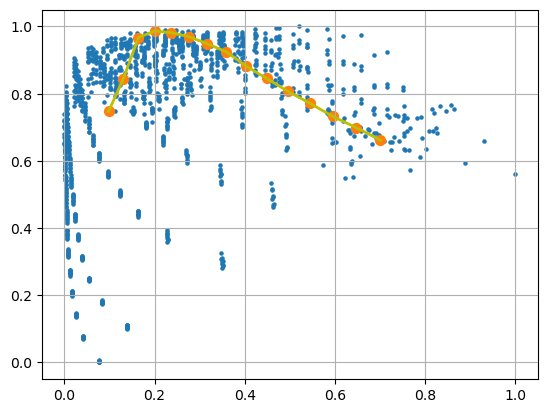

In [19]:
# plot efficiency
plt.scatter(x_datan[:,[3]], y_datan[:,[1]], s=5)

# test flow
plt.scatter(x_dataTn[:,[3]], y_predictedTn[:,[1]], s=50)
plt.plot   (x_dataTn[:,[3]], y_predictedTn[:,[1]], 'y', linewidth=2)

plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)

### video


In [20]:
#for x in range(100):
#  # One epoch
#  model.fit( x_data, y_data, epochs=1, verbose=1)
#
#  # Compute the output 
#  y_predicted = model.predict(x_data)
#
#  # Display the result
#  plt.scatter(x_data[::1], y_data[::1], s=2)
#  plt.plot(x_data, y_predicted, 'r', linewidth=4)
#  plt.grid()
#  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
#  plt.ylim(bottom=-1.2)  
#  #plt.show()
#  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
#  #files.download('training-' + str(x) +'-epochs.png') 
#  plt.clf()

